### Introduction
This notebook enhances the previous analysis of coefficients of lift and drag in cylinder vortex shedding by now varying the sparsity of the SINDy method, thereby producing a range of sparse models.

We again load the data and time-delay embed our chosen signal; we then iteratively fit models to the data using SINDy with varying $\lambda$, the parameter that controls sparsity. At $\lambda = 0$, as in the previous notebook, all terms are online. As $\lambda$ increases, the number of terms in the system of ODEs decreases.



In [1]:
###  Import modules

import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
import json

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


###  Load the analysis settings and parameters

#  Load the configuration file with all settings
with open('Lift-config.json', 'r') as f:
    config = json.load(f)

#  Read out and import all variables
for key, value in config.items():  print(f"{key}: {value}")
globals().update(config)



Re: 50
l_d_flag: lift
t_trm_1: 25000
t_trm_2: 50000
TDE_or_ddt: TDE
TD_Embed: 2
threshold: 1
diff_order: 2
poly_order: 3
should_normalize: 1


In [2]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [3]:
###  Load data

from LoadData_lift import fnc_LoadData_lift
t , C_l , C_d , dt = fnc_LoadData_lift( Re , t_trm_1 , t_trm_2 )


###  Raise dimension of system by either time-delay embedding or time-differentiating

from raiseDim_lift import fnc_raiseDim_lift
t_PS , data_1 , data_2 = \
fnc_raiseDim_lift( TDE_or_ddt , t , TD_Embed, C_l , C_d , l_d_flag , should_normalize)



In [5]:
###  Initiate and run SINDy, iteratively for varying sparisty

from runSINDy_Iter_Sparsity import fnc_runSINDy_Iter_Sparsity
threshold_vec , Coefs_u1 , Coefs_u2 , NRMSE_1 , NRMSE_2 , NRMSE_sys = \
fnc_runSINDy_Iter_Sparsity( data_1 , data_2 , t_PS , dt , diff_order , poly_order , threshold)



Iterating from lambda = 0 to lambda = 1
Iteration  =  0  /  20  |  lambda  =  0.0
Iteration  =  2  /  20  |  lambda  =  0.1
Iteration  =  4  /  20  |  lambda  =  0.2
Iteration  =  6  /  20  |  lambda  =  0.30000000000000004
Iteration  =  8  /  20  |  lambda  =  0.4
Iteration  =  10  /  20  |  lambda  =  0.5
Iteration  =  12  /  20  |  lambda  =  0.6000000000000001
Iteration  =  14  /  20  |  lambda  =  0.7000000000000001
Iteration  =  16  /  20  |  lambda  =  0.8
Iteration  =  18  /  20  |  lambda  =  0.9
Iteration  =  20  /  20  |  lambda  =  1.0


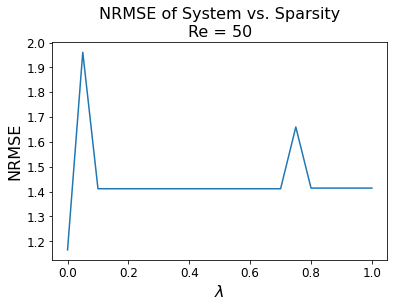

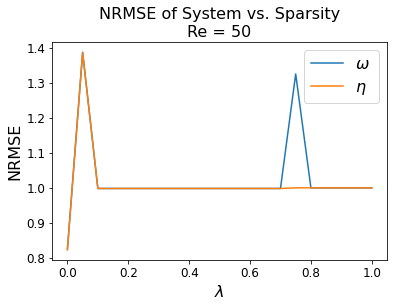

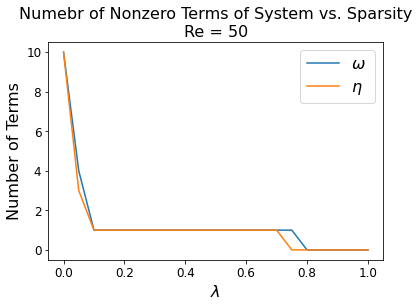

In [6]:
###  Plot NRMSE of the system vs. sparsity

plt.figure()
plt.plot( threshold_vec , NRMSE_sys  )
plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('NRMSE' , fontsize=16)
ttl_str = 'NRMSE of System vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


###  Plot NRMSE of each signal vs. sparsity

plt.figure()
plt.plot( threshold_vec , NRMSE_1 , label=r'$\omega$' )
plt.plot( threshold_vec , NRMSE_2 , label=r'$\eta$  ' )
plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('NRMSE' , fontsize=16)
ttl_str = 'NRMSE of System vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.show()


###  Plot number of nonzero terms of each signal vs. sparsity

plt.figure()
plt.plot( threshold_vec , np.count_nonzero(Coefs_u1 , axis=1) , label=r'$\omega$' )
plt.plot( threshold_vec , np.count_nonzero(Coefs_u2 , axis=1) , label=r'$\eta$  ' )
plt.xlabel(r'$\lambda$' , fontsize=16)
plt.ylabel('Number of Terms' , fontsize=16)
ttl_str = 'Numebr of Nonzero Terms of System vs. Sparsity' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.show()



In [ ]:
###  Plot the coefficients of the system vs. sparsity



